#  Rain Prediction using Logistic Regression

## Problem Statement
The goal of this project is to build a logistic regression model that can predict whether it will rain tomorrow in Australia based on weather conditions today. This binary classification problem uses historical weather data including temperature, humidity, rainfall, and other features to make accurate predictions.

In [1]:
# 1. Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay


##  Data Cleaning & Preprocessing
We begin by cleaning the dataset. We drop missing values in the target column (`RainTomorrow`) and a few selected features. This helps ensure clean and consistent input for model training.

In [2]:
# 2. Load Data
df = pd.read_csv("C:\\Users\\PRATIK KALE\\Downloads\\archive (5)\\weatherAUS.csv")
print("Shape before dropping NA:", df.shape)

# Drop NA in Target + selected features
df.dropna(subset=['RainToday', 'RainTomorrow'], inplace=True)
df = df[['MinTemp', 'MaxTemp', 'Rainfall', 'Humidity3pm', 'RainToday', 'RainTomorrow']].dropna()
print("Shape after dropping NA:", df.shape)


Shape before dropping NA: (145460, 23)
Shape after dropping NA: (136922, 6)


##  Label Encoding
We convert categorical columns (RainToday and RainTomorrow) into numeric form using LabelEncoder so they can be used for model training.

In [3]:
# Encode Target and Binary Feature
le = LabelEncoder()
df['RainToday'] = le.fit_transform(df['RainToday'])
df['RainTomorrow'] = le.fit_transform(df['RainTomorrow'])


##  Data Visualization
Below are visualizations that help us understand the target distribution, feature-target relationships, and any trends in the dataset.

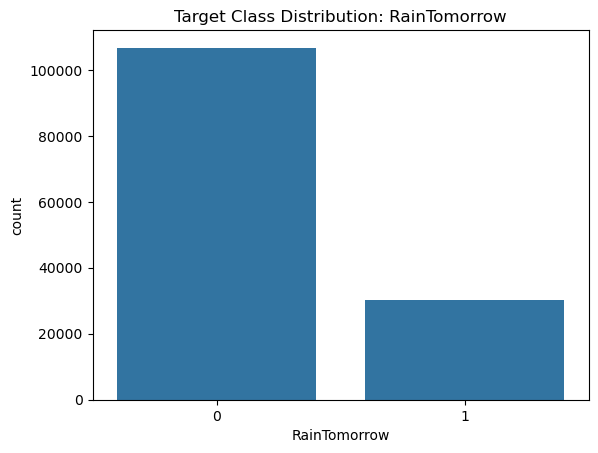

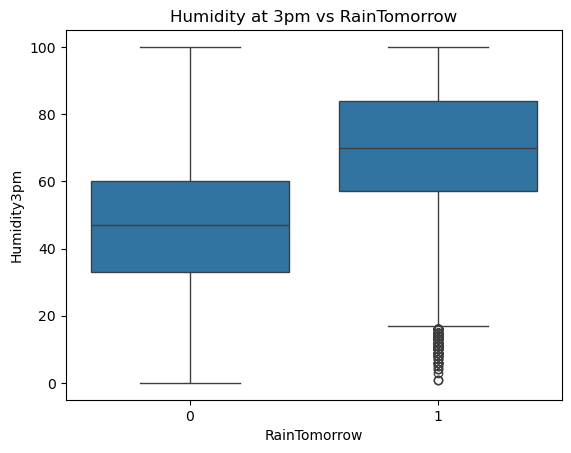

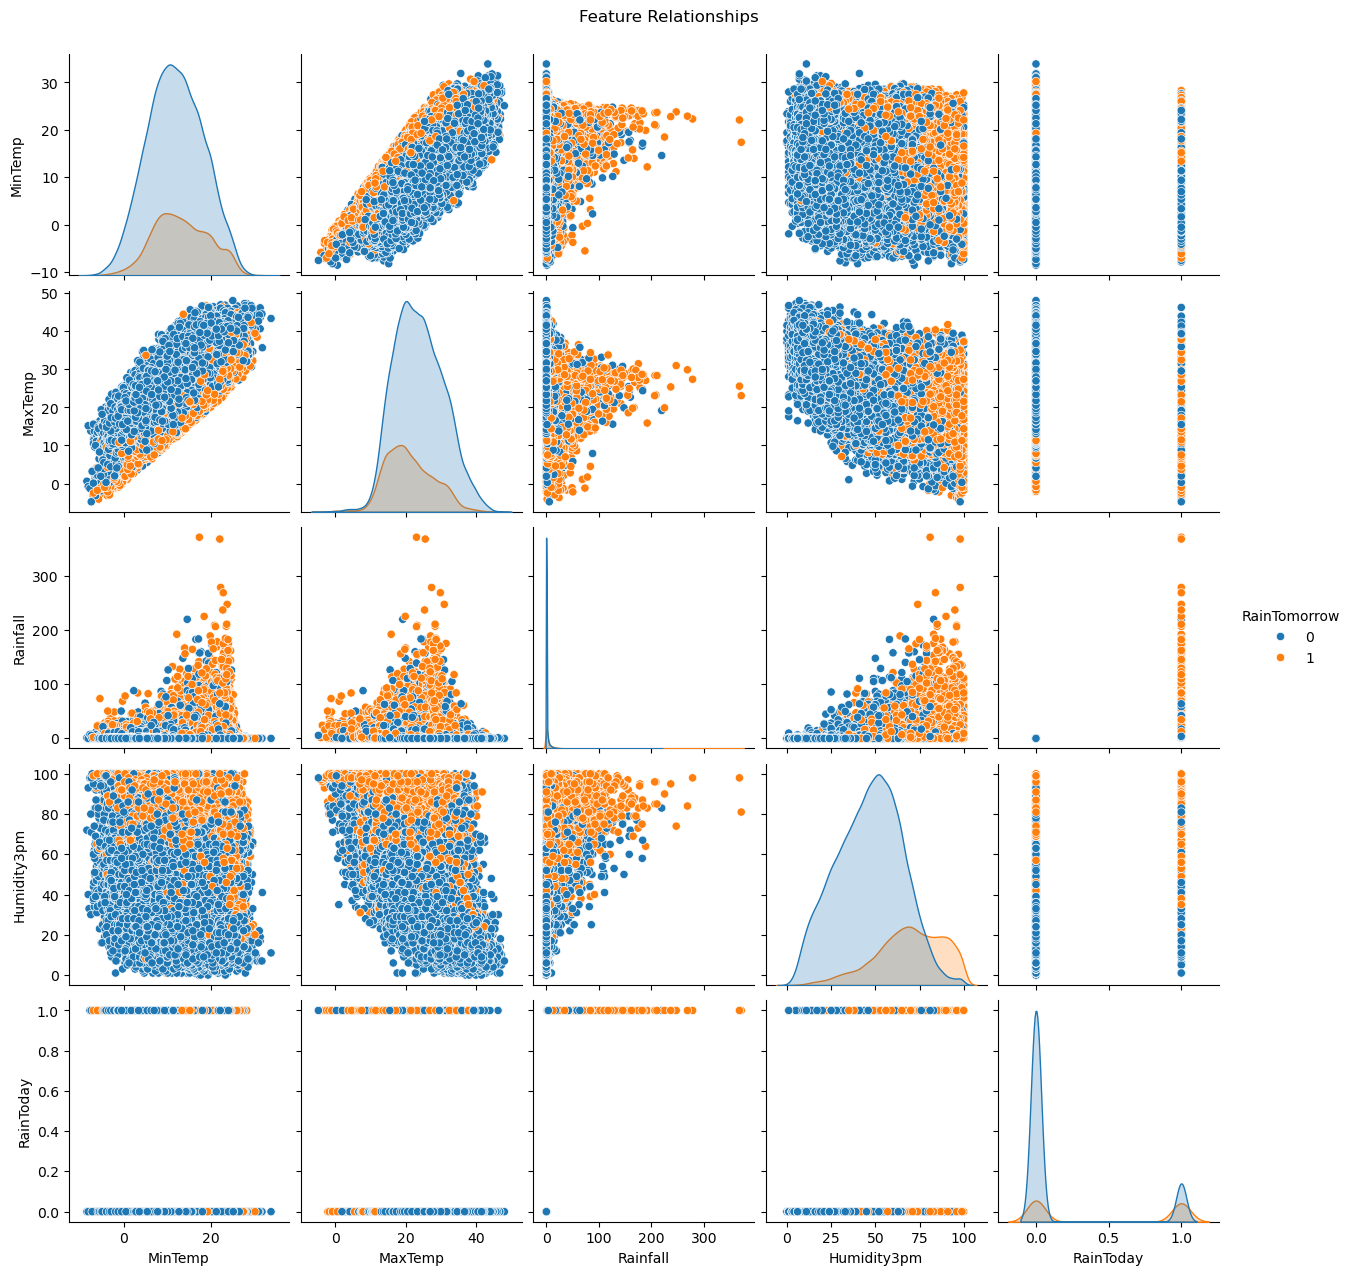

In [4]:
# EDA
sns.countplot(data=df, x='RainTomorrow')
plt.title("Target Class Distribution: RainTomorrow")
plt.show()

sns.boxplot(data=df, x='RainTomorrow', y='Humidity3pm')
plt.title("Humidity at 3pm vs RainTomorrow")
plt.show()

sns.pairplot(df, hue="RainTomorrow")
plt.suptitle("Feature Relationships", y=1.02)
plt.show()


##  Feature Scaling
We use StandardScaler to normalize the numerical features. This step is important for logistic regression so that all features contribute equally.

In [5]:
# Train/Test Split and Scaling
X = df.drop('RainTomorrow', axis=1)
y = df['RainTomorrow']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


##  Model Training
We train a logistic regression model using the training set. Logistic regression is used here because it's simple, interpretable, and efficient for binary classification tasks.

In [6]:
# Train Logistic Regression
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

# Predictions
y_pred = model.predict(X_test_scaled)


##  Model Evaluation
We evaluate the model using accuracy, confusion matrix, and classification metrics like precision, recall, and F1-score.

Accuracy: 0.8328

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.96      0.90     21271
           1       0.73      0.40      0.52      6114

    accuracy                           0.83     27385
   macro avg       0.79      0.68      0.71     27385
weighted avg       0.82      0.83      0.81     27385



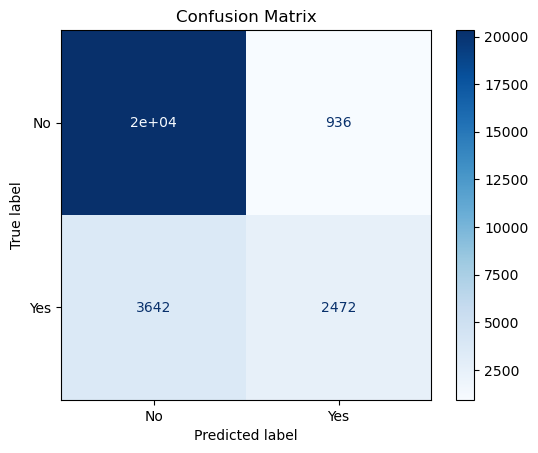

In [7]:
# Evaluate Model
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:.4f}\n")
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()


##  Logistic Regression Coefficients
We visualize the learned coefficients from the logistic regression model. These coefficients help us understand the influence of each feature on the prediction.

C:\Users\PRATIK KALE\AppData\Local\Temp\ipykernel_11064\1020962162.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=coeff_df, x='Coefficient', y='Feature', palette='viridis')


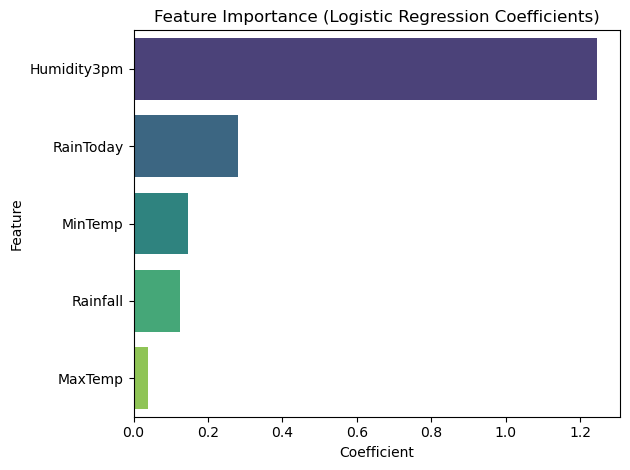

In [8]:
# Feature Importance
coeff_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_[0]
}).sort_values(by='Coefficient', key=abs, ascending=False)

sns.barplot(data=coeff_df, x='Coefficient', y='Feature', palette='viridis')
plt.title("Feature Importance (Logistic Regression Coefficients)")
plt.tight_layout()
plt.show()


##  Sample Prediction
We demonstrate how to use the trained model to predict whether it will rain tomorrow for a hypothetical weather scenario.

In [9]:
# Sample Prediction
sample = np.array([[15.0, 25.0, 2.5, 70.0, 1]])  # Example input
sample_scaled = scaler.transform(sample)
pred = model.predict(sample_scaled)[0]
print("Prediction for Sample (1=Rain, 0=No Rain):", pred)


Prediction for Sample (1=Rain, 0=No Rain): 0


C:\Users\PRATIK KALE\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


##  Conclusion
- Logistic Regression performed well for this binary classification task.
- Humidity3pm and RainToday were key features.
- The model is interpretable and ready for further enhancements like hyperparameter tuning or comparing with other models.